# Consumer segmentation using PCA 

### Description 

A pilot survey was conducted of 30 individuals to understand their different attitudes towards discount stores (e.g., K-Mart), which usually come with low levels of service versus department stores (e.g., Macys) which come with higher levels of service. <br>
<br>
Respondents were asked their opinion on a 0-9 agree-disagree scale (where 0 indicates strongly disagree and 9 indicates strongly agree) on the following questions.<br>

1. I never go back to a store that treated me with disrespect.

2. I find sales people who fawn over me irritating, I just expect them to be courteous.
3. I have a lot of questions when I shop I greatly appreciate a sales person who is
willing to spend time answering my questions.
4. I care little for the fancy displays in department stores.
5. Discount stores are much more of a bargain than department stores.

#### `1. Importing, scaling and summarizing the data.`

In [43]:
# Import necessary libraries 
import pandas as pd 

# Load the dataset as a pandas dataframe
df = pd.read_csv('data.csv')
df.index = range(1, len(df) + 1)

# Take a look at the dataset 
df.head()

,Resp,X1,X2,X3,X4,X5
1,1,6,0,8,4,4
2,2,4,9,2,8,9
3,3,2,8,2,6,9
4,4,5,7,3,9,6
5,5,3,8,3,9,6


In [44]:
# Check some summary statistics for the data 
df.describe().round(2)

,Resp,X1,X2,X3,X4,X5
count,30.00,30.00,30.00,30.00,30.00,30.00
mean,15.50,4.40,5.13,3.67,5.40,4.53
std,8.80,2.94,3.06,2.75,2.91,2.85
min,1.00,0.00,0.00,0.00,0.00,0.00
25%,8.25,2.00,2.50,2.00,2.50,2.00
50%,15.50,5.00,6.00,3.00,6.00,4.00
75%,22.75,7.00,7.75,5.75,8.00,6.00
max,30.00,9.00,9.00,9.00,9.00,9.00


In [45]:
# Import a scaler to scale the data 
from sklearn.preprocessing import scale 

# We select the columns we want to scale (scaling the Resp column does not make sense)
columns_to_scale = ['X1', 'X2', 'X3', 'X4', 'X5']

# Create a copy of the original dataframe before scaling
df_scaled = df.copy() 

# Scale the chosen data
df_scaled[columns_to_scale] = scale(df[columns_to_scale])

# Take a look at the scaled data 
df_scaled.head()

,Resp,X1,X2,X3,X4,X5
1,1,0.552931,-1.706482,1.605061,-0.489698,-0.190368
2,2,-0.138233,1.285402,-0.617331,0.909439,1.594335
3,3,-0.829396,0.952971,-0.617331,0.209871,1.594335
4,4,0.207349,0.620539,-0.246932,1.259224,0.523513
5,5,-0.483814,0.952971,-0.246932,1.259224,0.523513


In [46]:
# Summarize the now scaled data 
df_scaled.describe().round(2)

,Resp,X1,X2,X3,X4,X5
count,30.00,30.00,30.00,30.00,30.00,30.00
mean,15.50,-0.00,-0.00,0.00,-0.00,0.00
std,8.80,1.02,1.02,1.02,1.02,1.02
min,1.00,-1.52,-1.71,-1.36,-1.89,-1.62
25%,8.25,-0.83,-0.88,-0.62,-1.01,-0.90
50%,15.50,0.21,0.29,-0.25,0.21,-0.19
75%,22.75,0.90,0.87,0.77,0.91,0.52
max,30.00,1.59,1.29,1.98,1.26,1.59


#### `2. Present the matrix of correlation for the five variables and plot the correlations.`

In [47]:
# We create a correlation matrix
correlation_matrix  = df_scaled[columns_to_scale].corr()

In [48]:
# Let's take a look at it 
correlation_matrix

,X1,X2,X3,X4,X5
X1,1.000000,-0.710739,0.878954,0.343297,-0.038650
X2,-0.710739,1.000000,-0.831827,0.257365,0.470151
X3,0.878954,-0.831827,1.000000,0.172746,-0.020566
X4,0.343297,0.257365,0.172746,1.000000,0.664214
X5,-0.038650,0.470151,-0.020566,0.664214,1.000000


* Let's take another look at it... but better this time.


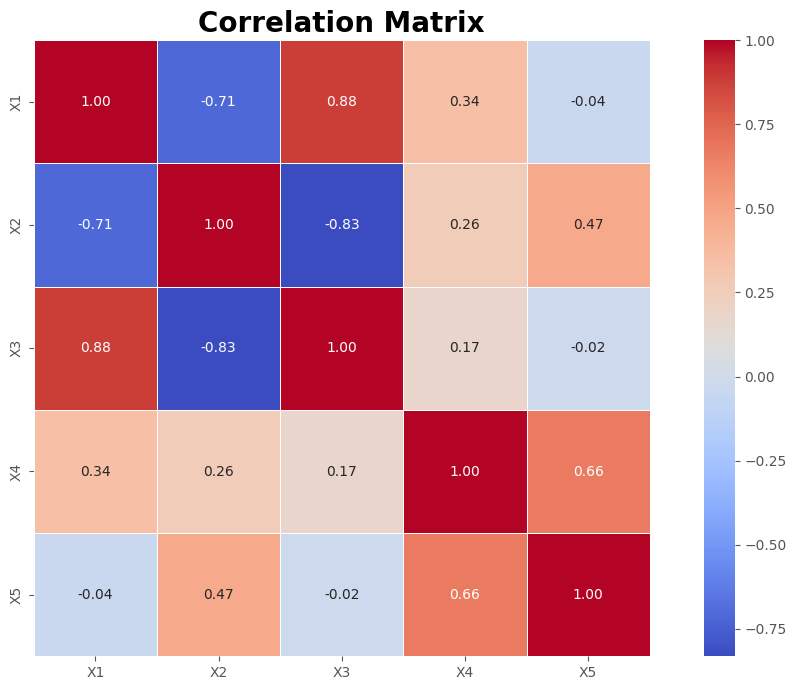

In [49]:
from matplotlib import pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linecolor='white', linewidths=0.5)
plt.title("Correlation Matrix", fontweight='bold', fontsize=20)
plt.show()

`Based on the correlation matrix above :`

•	X1 and X3 have a strong positive correlation (0.88), suggesting that respondents who agree with the sentiment of not returning to stores that treat them with disrespect (X1) also tend to believe strongly that discount stores are a better bargain (X3).<br>
<br>
•	X2 and X3 show a strong negative correlation (-0.83), implying that respondents who find fawning salespeople irritating (X2) tend to disagree with the idea that discount stores are better bargains (X3).<br>
<br>
•	X4 and X5 have a moderate positive correlation (0.66), indicating that respondents who care little for department store displays (X4) also believe discount stores offer better value (X5).<br>
<br>
•	Weak correlations, such as between X1 and X5 (-0.04), suggest little to no relationship between those who care about disrespectful treatment and preferences for discount stores.<br>

This analysis helps in identifying potential groupings of consumer preferences regarding shopping behaviors and attitudes toward department versus discount stores.

#### `3. We perform Principal Component Analysis (PCA) on the data and show the results.` 

In [50]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=None)
pca.fit(df_scaled.iloc[:, 1:6])  # we only choose the numerical columns from the dataset

# Get the explained variance ratios (how much variance is captured by each principal component)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Create a summary DataFrame
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Display the summary DataFrame
pca_summary.transpose()

,0,1,2,3,4
Principal Component,PC1,PC2,PC3,PC4,PC5
Explained Variance,0.534317,0.370443,0.068393,0.018728,0.008119
Cumulative Variance,0.534317,0.90476,0.973153,0.991881,1.0


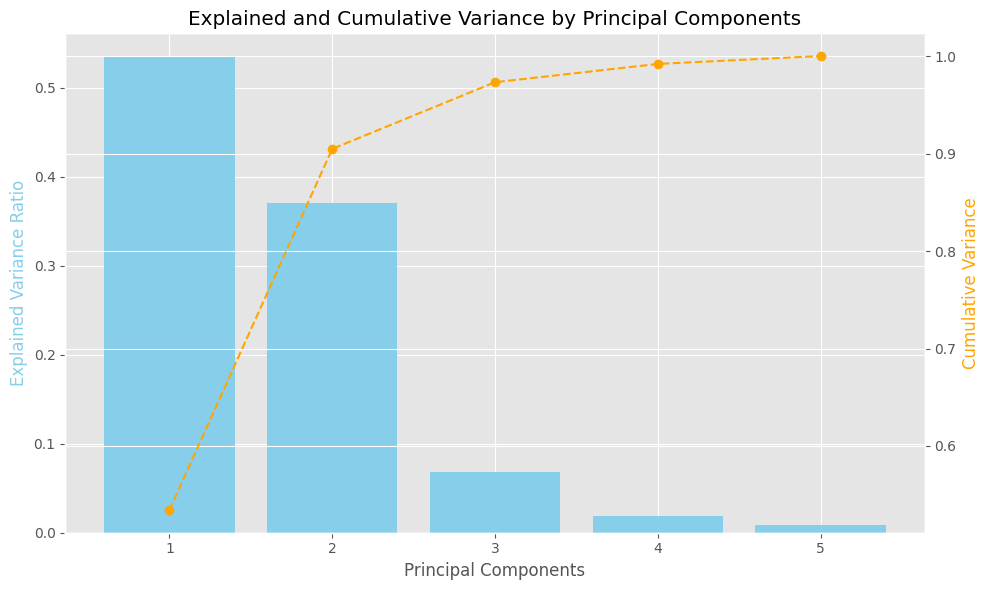

In [51]:
# Create the figure and the axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for explained variance
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', label='Explained Variance')

# Set labels and title for bar plot
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color='skyblue')
ax1.set_title('Explained and Cumulative Variance by Principal Components')

# Create a secondary y-axis to plot the cumulative variance
ax2 = ax1.twinx()

# Line plot for cumulative variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='orange', marker='o', linestyle='--', label='Cumulative Variance')

# Set the y-axis label for cumulative variance
ax2.set_ylabel('Cumulative Variance', color='orange')

# Add grid and show the plot
ax1.grid(True)
fig.tight_layout()
plt.show()

* Let's take a look at the explained variance (how much variance is explained by each principal component)

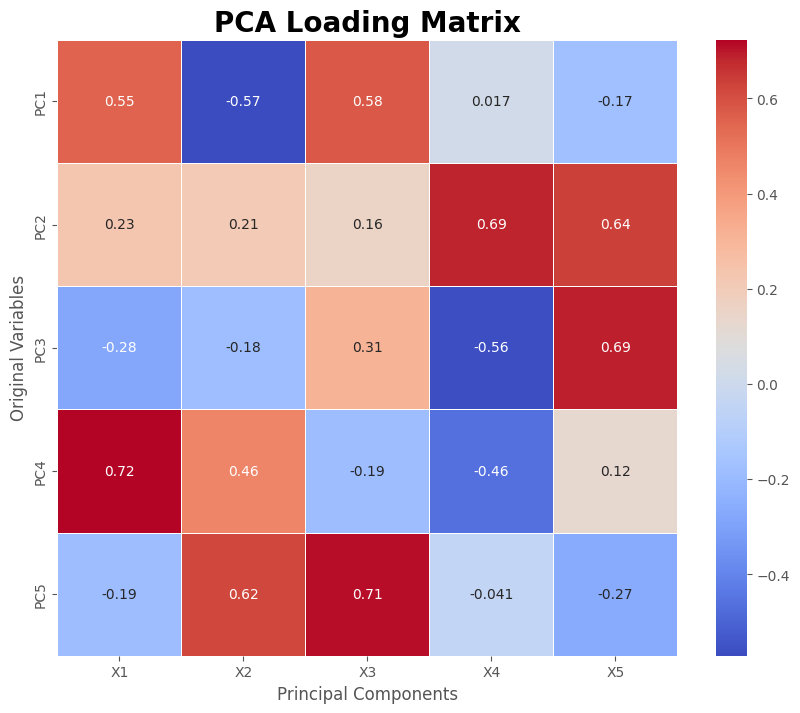

In [52]:
# Get the loadings (coefficients) of the principal components
loadings = pd.DataFrame(pca.components_, columns=columns_to_scale, index=[f'PC{i+1}' for i in range(len(explained_variance))])

# Display the loading matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('PCA Loading Matrix', fontsize=20, fontweight='bold')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
plt.show()

#### `4.Equations defining the relationship between the original attributes and the factors from the PCA` 

* In Principal Component Analysis (PCA), the relationship between the original variables (or attributes) and the principal components (or factors) is defined by a **linear combination** of the original variables. These relationships are given by the **loading matrix** and can be expressed using the following equations.

$$
PC_1 = L_{11}X_1 + L_{12}X_2 + L_{13}X_3 + L_{14}X_4 + L_{15}X_5
$$

$$
PC_2 = L_{21}X_1 + L_{22}X_2 + L_{23}X_3 + L_{24}X_4 + L_{25}X_5
$$

$$
PC_3 = L_{31}X_1 + L_{32}X_2 + L_{33}X_3 + L_{34}X_4 + L_{35}X_5
$$

$$
PC_4 = L_{41}X_1 + L_{42}X_2 + L_{43}X_3 + L_{44}X_4 + L_{45}X_5
$$

$$
PC_5 = L_{51}X_1 + L_{52}X_2 + L_{53}X_3 + L_{54}X_4 + L_{55}X_5
$$

Where:

• $L_{ij}$ is the loading of the $i$-th variable on the $j$-th principal component.

More generally, each principal component (factor) is a linear combination of the original attributes, and the equation for the $j$-th principal component is:

$$
\text{PC}_j = L_{1j} X_1 + L_{2j} X_2 + \cdots + L_{pj} X_p
$$

#### `5. How many factors or principal components should we retain ?`

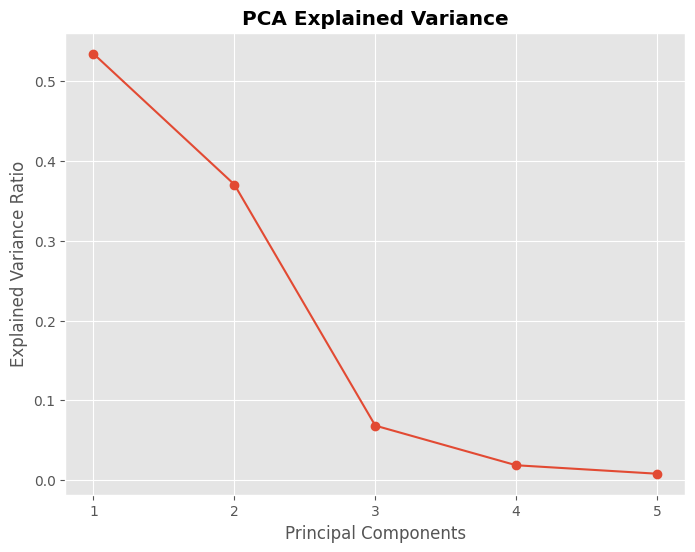

In [53]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance', fontweight='bold')
plt.grid(True)

# Set x-axis to only show integers
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

* Based on the analysis of the explained variance ratio graph, we have chosen to retain 3 principal components for our PCA analysis.<br>
<br>
* The graph clearly indicates that the first 3 components capture a significant portion of the total variance (around 0.94), with the explained variance ratio sharply decreasing after the third component.<br>
 <br>
 * This point aligns with the "elbow" in the curve, where the marginal gain in explained variance becomes minimal with the addition of further components.<br>
 <br>
* By selecting 3 components, we can effectively balance dimensionality reduction with the preservation of essential information, ensuring that the resulting dataset remains interpretable and meaningful for subsequent analysis.

#### `6. Can you think of intuitive names for the first and second factors? What do these factors represent?`

Based on the PCA results, we could intuitively name the first two factors:

Factor 1: **Customer Service Sensitivity** 
* This factor likely represents attitudes toward the quality of service received in stores.<br>
<br>

Factor 2: **Value Perception** 
* This factor could represent the perceived value of discount versus department stores.

These names are derived from the strong correlations observed in the PCA component matrix, where certain variables load heavily on these factors.

The main idea is that one factor seems to be heavily correlated with the customer service sensitivity, whereas the other seems most positively correlated with the perception of value.  
This is a very basic interpretation, and there are many more sophisticated ways to analyze and interpret principal components.

#### `7. Plot of Customers on a 2D map based on the first two Principal Components`

* We will also use the k-means algorithm to better visualize clusters 

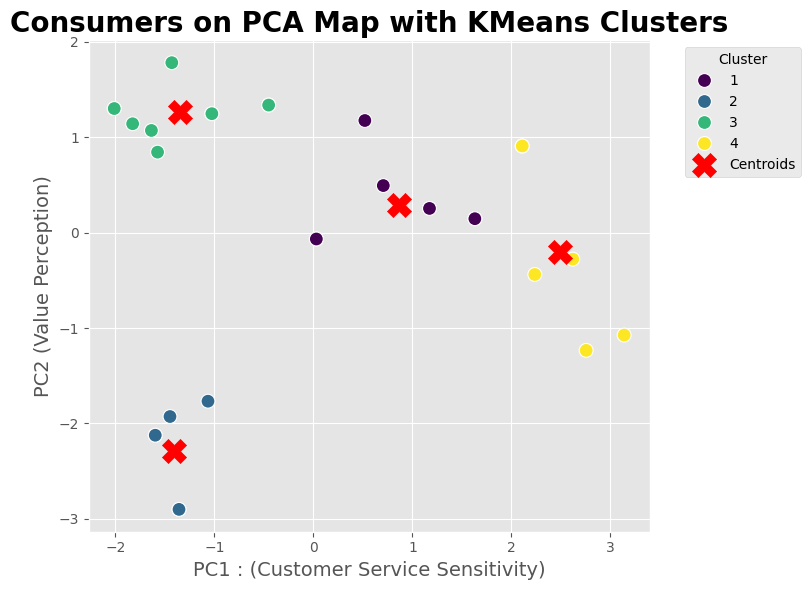

In [54]:
from sklearn.cluster import KMeans

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled[columns_to_scale])

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility
pc_df['Cluster'] = kmeans.fit_predict(pc_df[['PC1', 'PC2']])

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Adjust cluster labels to start from 1
pc_df['Cluster'] += 1

# Plotting with clusters and centroids
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, hue_order=[1, 2, 3, 4], legend='full')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')  # Crosses for centroids

# Set plot title and labels
plt.title('Consumers on PCA Map with KMeans Clusters', fontsize=20, fontweight='bold')
plt.xlabel('PC1 : (Customer Service Sensitivity)', fontsize=14)
plt.ylabel('PC2 (Value Perception)', fontsize=14)
plt.grid(True)

# Add legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* Cluster 1 (purple): These people are generally more engaged and have a high level of consistency.
* Cluster 2 (blue): These people have a moderate level of engagement and a wide range of consistency.
* Cluster 3 (green): These people have a high level of engagement but their consistency varies.
* Cluster 4 (yellow): These people have low levels of engagement and a varied level of consistency.

* Segment 4 is the most profitable because it is in the high engagement, high consistency quadrant. This indicates that customers in this segment are highly interested in the product and have a strong tendency to purchase it again. This leads to high customer lifetime value, which is a key driver of profitability.

#### `8.Identification of Segments`

Based on the visual interpretation of the scatter plot, we can identify approximately four segments:

* High Service Seekers : Consumers who prioritize high levels of service and have strong negative feelings toward disrespectful treatment.

* Value Shoppers : Consumers who appreciate discounts and perceive discount stores as more valuable.

* Moderate Attitude Consumers : Consumers who have mixed *feelings about both service and value, showing moderate responses.

* Indifferent Consumers : Consumers who exhibit less strong opinions on the attributes, possibly indicating indifference to store types.

#### `9. Characteristics of Segments`


* High Service Seekers : Likely to rate high on X1 and X3, indicating they value respectful treatment and assistance from salespeople. They may prefer department stores.

* Value Shoppers : Likely to rate high on X5 and lower on X4, indicating they see discount stores as a better bargain and care less about store displays.

* Moderate Attitude Consumers : Exhibit moderate ratings across all questions, indicating a balanced view of both service and value.

* Indifferent Consumers : Show low variability in responses, indicating a lack of strong feelings toward either type of store.

#### `10. Most Profitable Segment`

**The High Service Seekers** segment is expected to be the most profitable. <br>
This group is likely to spend more in department stores where they receive better service, leading to higher sales for those retailers.<br>
<br> 
Assuming the data is representative, if this segment comprises around 25% of the respondents, it indicates a significant market opportunity for retailers focusing on customer service.

In conclusion, the PCA analysis provides valuable insights into consumer attitudes and can guide marketing strategies by identifying distinct segments based on their preferences. The segments can be targeted with tailored marketing approaches to enhance customer satisfaction and drive sales.